In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Normalization is a technique often applied as part of data preparation
for machine learning. The goal of normalization is to change the values of
numeric columns in the dataset to use a common scale, without distorting
differences in the ranges of values or losing information

#### Types of Normalization
<ol style="font-size: 17px; line-height: 1.2; padding-left: 1; margin-top: 0;">
    <li>Min-Max Scaling --> when we have to stick within a minnimum and maximum value</li>
    <li>Mean Normalization --> When we want centre data around the Mean</li>
    <li>Max Absolute</li>
    <li>Robust Scaling --> works good when we want to be robust against outliers</li>
</ol>

## Min-Max Scaling
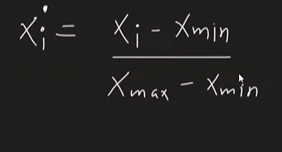

scale remains within 0 and 1

In [4]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\codes\python\Learn_ML\1. Datasets\wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class Label","Alcohol","Malic Acid"]

In [5]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


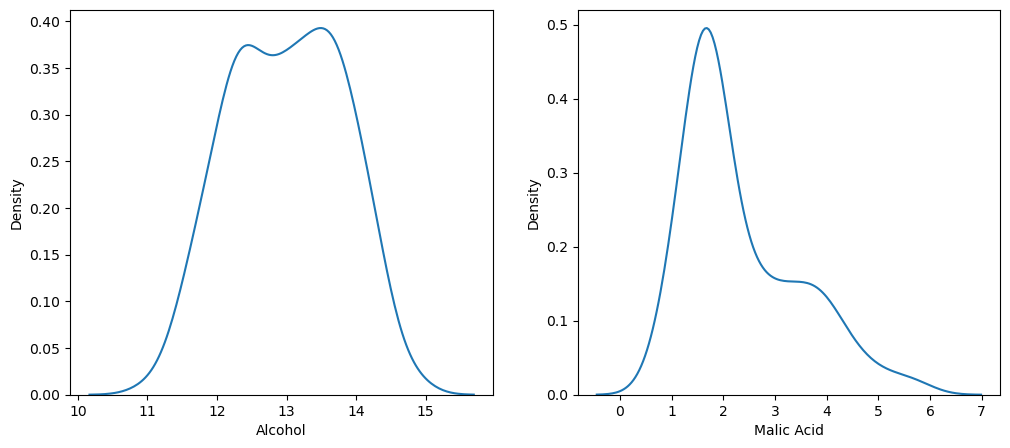

In [22]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(df["Alcohol"],ax=ax1)
sns.kdeplot(df["Malic Acid"],ax=ax2)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fitting
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [21]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


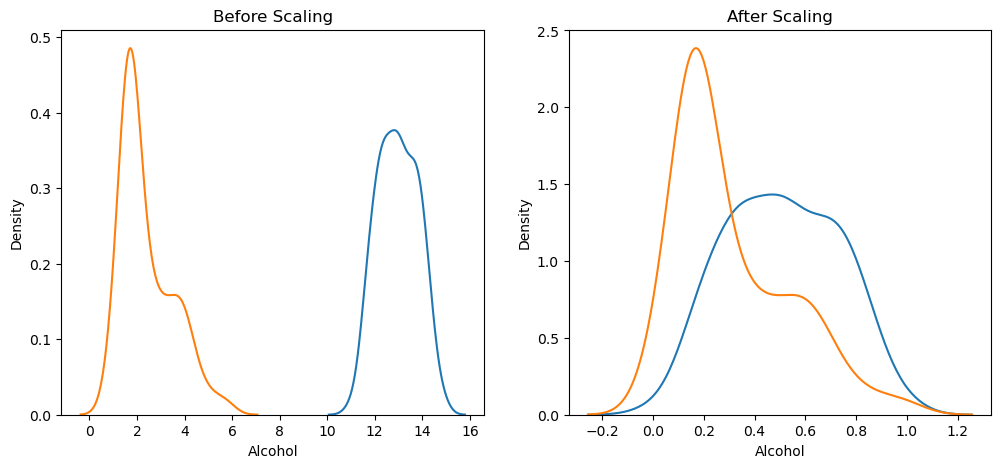

In [33]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
ax2.set_title("After Scaling")
plt.show()

## Mean Normalization

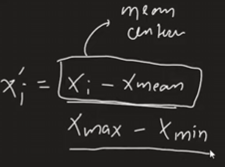

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=False)

#fitting
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [37]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [38]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,-0.0,0.0
std,0.8,1.1
min,-1.9,-1.5
25%,-0.7,-0.8
50%,-0.0,-0.5
75%,0.7,0.8
max,1.9,3.4


This process centers the data around 0 by subtracting the mean of each feature.

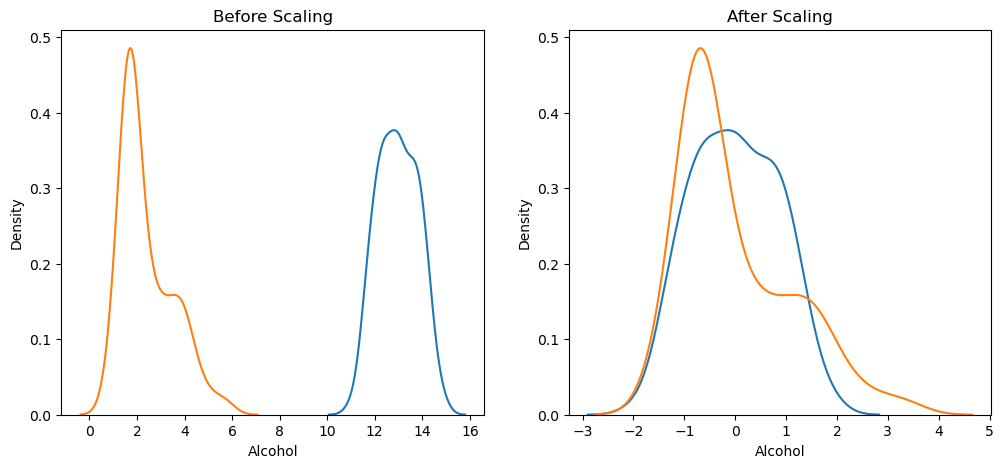

In [39]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
ax2.set_title("After Scaling")
plt.show()

##### Very rarely used where we need data to be centred

## Max-Absolute Scaling

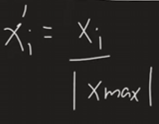

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [41]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

#fitting
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [43]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [44]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.5
max,1.0,1.0


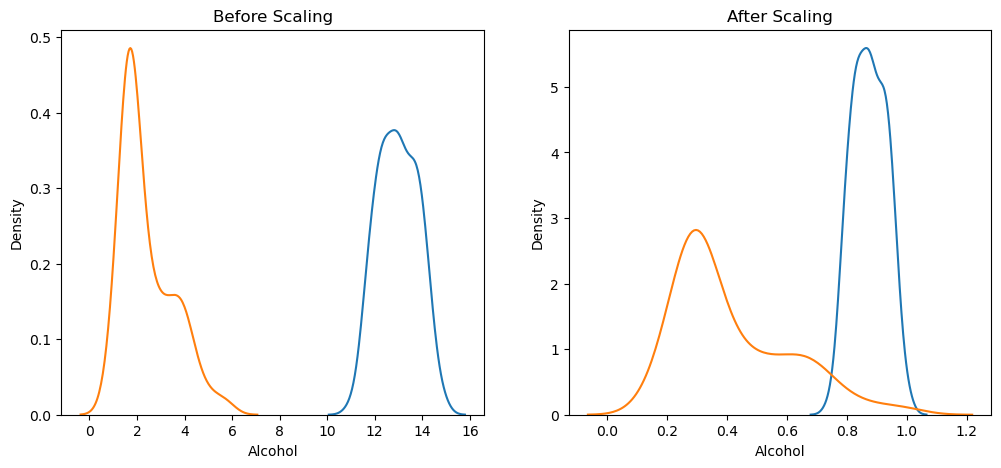

In [45]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
ax2.set_title("After Scaling")
plt.show()

#### MaxAbsScaling is used where we have sparse data where we have alot of zero's

## Robust Scaling

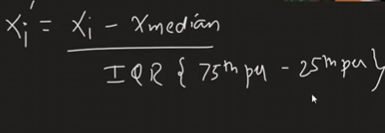

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop("Class Label",axis=1),df["Class Label"],test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [47]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#fitting
scaler.fit(X_train)

#transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [49]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.3,1.6
50%,12.9,1.9
75%,13.7,3.2
max,14.8,5.8


In [50]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.0,0.3
std,0.6,0.7
min,-1.4,-0.7
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.5


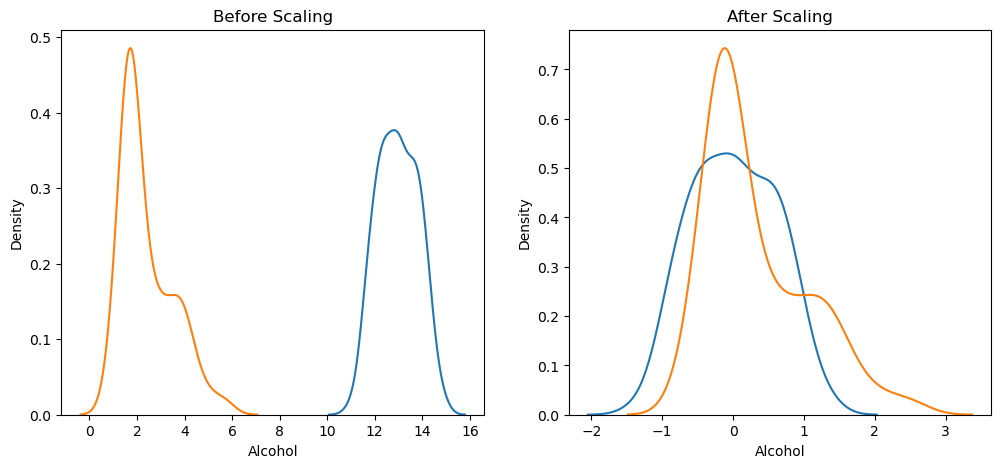

In [51]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train["Malic Acid"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)
sns.kdeplot(X_train_scaled["Malic Acid"],ax=ax2)
ax2.set_title("After Scaling")
plt.show()

#### Very robust to outliers generally we can perform it when we have a lot of outliers